In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
custSeg_ds = pd.read_csv("cust_seg.csv",low_memory=False,)

In [3]:
custSeg_ds.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
custSeg_ds = custSeg_ds.drop("Unnamed: 0",axis=1)

In [5]:
custSeg_ds.columns = ['data_date', 'customer_code', 'employee_index', 'customer_country_residence','customer_gender','age', 'bank_entry_date','new_customer_index', 'customer_seniority','first/primary_customer','last_date_as_primary_customer','customer_type_at_the_ beginning_of_the_month','customer_relation_type_at_the_beginning_of_the_ month','residence_index','foreign_index','spouse_index','type_of_channel','deceased_index_(N/S)','addres_type','province_code','province_name','activity_index','gross_income_of_the_ household','saving_account','guarantees','current_account','derivative_account','payroll_account','junior_account','mas_particular_account','particular_account','particular_plus_account','short_term_deposits','medium_term_deposits','long_term_deposits','e-account','funds','mortgage','pensions','loans','taxes','credit_card','securities','home_account','payroll','pensions','direct_debit']

In [6]:
custSeg_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count    Dtype  
---  ------                                                 --------------    -----  
 0   data_date                                              1000000 non-null  object 
 1   customer_code                                          1000000 non-null  int64  
 2   employee_index                                         989218 non-null   object 
 3   customer_country_residence                             989218 non-null   object 
 4   customer_gender                                        989214 non-null   object 
 5   age                                                    1000000 non-null  object 
 6   bank_entry_date                                        989218 non-null   object 
 7   new_customer_index                                     989218 non-null   float64
 8   customer_seniority     

In [7]:
custSeg_ds.head()

,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [8]:
# Create table for missing/null data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [9]:
draw_missing_data_table(custSeg_ds)

,Total,Percent
spouse_index,999822,0.999822
last_date_as_primary_customer,998899,0.998899
gross_income_of_the_ household,175183,0.175183
province_name,17734,0.017734
province_code,17734,0.017734
type_of_channel,10861,0.010861
customer_gender,10786,0.010786
customer_relation_type_at_the_beginning_of_the_ month,10782,0.010782
activity_index,10782,0.010782
addres_type,10782,0.010782


In [10]:
custSeg_ds.isnull().sum().sum()

2371207

In [11]:
custSeg_ds["customer_code"].value_counts()

281941     2
362212     2
362218     2
362219     2
362220     2
          ..
1310578    1
1310579    1
1310645    1
1310643    1
1183305    1
Name: customer_code, Length: 626159, dtype: int64

In [12]:
custSeg_ds.set_index('customer_code')

,data_date,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,last_date_as_primary_customer,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
customer_code,,,,,,,,,,,,,,,,,,,,,
1375586,2015-01-28,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050611,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050612,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050613,2015-01-28,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050614,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183296,2015-02-28,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,1
1183295,2015-02-28,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1183294,2015-02-28,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,1


In [13]:
custSeg_ds.describe()

,customer_code,new_customer_index,first/primary_customer,customer_type_at_the_ beginning_of_the_month,addres_type,province_code,activity_index,gross_income_of_the_ household,saving_account,guarantees,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
count,1.000000e+06,989218.000000,989218.000000,989218.000000,989218.0,982266.000000,989218.000000,8.248170e+05,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,994598.000000,994598.000000,1000000.000000
mean,6.905967e+05,0.000489,1.109074,1.000085,1.0,26.852131,0.564971,1.396462e+05,0.000177,0.000039,...,0.009982,0.014553,0.004661,0.072581,0.066084,0.039378,0.006442,0.071629,0.079543,0.166275
std,4.044084e+05,0.022114,3.267624,0.012954,0.0,12.422924,0.495761,2.389858e+05,0.013303,0.006245,...,0.099410,0.119755,0.068112,0.259448,0.248429,0.194493,0.080003,0.257873,0.270584,0.372327
min,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.364110e+05,0.000000,1.000000,1.000000,1.0,18.000000,0.000000,7.157184e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.644760e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,1.066519e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.074511e+06,0.000000,1.000000,1.000000,1.0,33.000000,1.000000,1.634325e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'gross_income_of_the_ household')

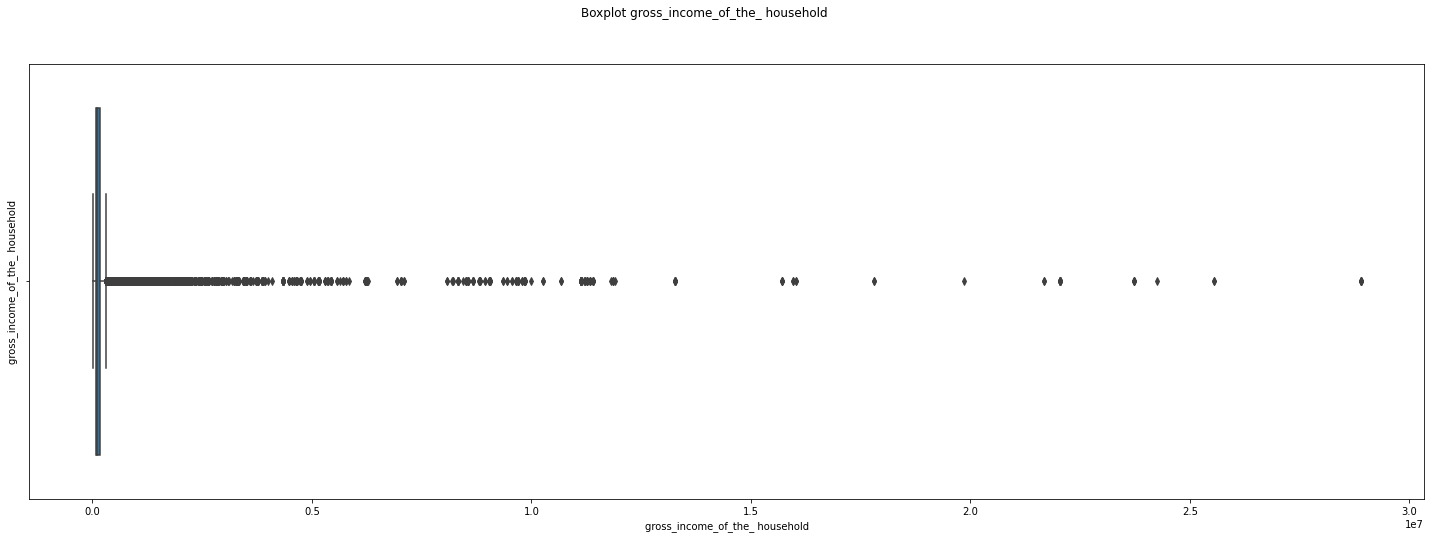

In [14]:
fig,axes = plt.subplots(figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot gross_income_of_the_ household')
sns.boxplot( x='gross_income_of_the_ household' , data=custSeg_ds ).set_ylabel("gross_income_of_the_ household")


In [15]:
duplicated_rows = custSeg_ds[custSeg_ds.duplicated()]
print('Duplicated rows:', duplicated_rows.shape[0])

Duplicated rows: 0


In [16]:
def outlier(col:str, df_:pd.DataFrame=custSeg_ds, remove:bool=False) -> list:
    """This function calculates the upper and lower fence
    of any column and can also remove from the dataset"""
    q1 = df_[col].quantile(0.25)
    q3 = df_[col].quantile(0.75)
    
    iqr = q3-q1
    lower_fence = q1 - iqr*1.5
    upper_fence = q3 + iqr*1.5

    if remove:
        temp = df_[(df_[col] > lower_fence) & (df_[col] < upper_fence)]
        return temp
    print('Upper and Lower Limits of gross_income_of_the_ household is:')
    return  [lower_fence, upper_fence]

In [17]:
outlier('gross_income_of_the_ household')

Upper and Lower Limits of gross_income_of_the_ household is:


[-66219.10500000001, 301223.41500000004]

# Data Cleanning

In [18]:
data = pd.read_csv("out_cust_seg.csv",low_memory=False)
data

,Unnamed: 0,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions.1,direct_debit
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,...,0,0,0,0,0,0,0,0.0,0.0,1


In [19]:
data.isnull().sum().sum()

2371207

In [20]:
#double check for missin values
pd.set_option('display.max_columns',None)
data

,Unnamed: 0,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,last_date_as_primary_customer,customer_type_at_the_ beginning_of_the_month,customer_relation_type_at_the_beginning_of_the_ month,residence_index,foreign_index,spouse_index,type_of_channel,deceased_index_(N/S),addres_type,province_code,province_name,activity_index,gross_income_of_the_ household,saving_account,guarantees,current_account,derivative_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e-account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions.1,direct_debit
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,28.0,MADRID,1.0,55516.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999996,999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,75654.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999997,999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,N,NaN,KFC,N,1.0,15.0,"CORUÑA, A",1.0,80634.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999998,999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,1.0,NaN,1.0,A,S,S,NaN,KFC,N,1.0,28.0,MADRID,1.0,57818.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


In [21]:
data.isnull().sum()

Unnamed: 0                                                    0
data_date                                                     0
customer_code                                                 0
employee_index                                            10782
customer_country_residence                                10782
customer_gender                                           10786
age                                                           0
bank_entry_date                                           10782
new_customer_index                                        10782
customer_seniority                                            0
first/primary_customer                                    10782
last_date_as_primary_customer                            998899
customer_type_at_the_ beginning_of_the_month              10782
customer_relation_type_at_the_beginning_of_the_ month     10782
residence_index                                           10782
foreign_index                           

1. Drop column Unnamed

# Solving missing values ways:

In [22]:
#Drop column Unnamed
data = data.drop("Unnamed: 0",axis=1)

3. Detect other values like "NA"

In [23]:
data[data['age'].str.contains('NA')]

,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,last_date_as_primary_customer,customer_type_at_the_ beginning_of_the_month,customer_relation_type_at_the_beginning_of_the_ month,residence_index,foreign_index,spouse_index,type_of_channel,deceased_index_(N/S),addres_type,province_code,province_name,activity_index,gross_income_of_the_ household,saving_account,guarantees,current_account,derivative_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e-account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions.1,direct_debit
261,2015-01-28,1050741,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998780,2015-02-28,1148591,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999111,2015-02-28,1148971,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0
999115,2015-02-28,1148968,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999577,2015-02-28,1147591,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0


In [24]:
df_NA = data[data['customer_seniority'].str.contains('NA')]
df_NA

,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,last_date_as_primary_customer,customer_type_at_the_ beginning_of_the_month,customer_relation_type_at_the_beginning_of_the_ month,residence_index,foreign_index,spouse_index,type_of_channel,deceased_index_(N/S),addres_type,province_code,province_name,activity_index,gross_income_of_the_ household,saving_account,guarantees,current_account,derivative_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e-account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions.1,direct_debit
261,2015-01-28,1050741,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998780,2015-02-28,1148591,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999111,2015-02-28,1148971,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0
999115,2015-02-28,1148968,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999577,2015-02-28,1147591,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0


In [25]:
data.drop(data.loc[data['age'].str.contains('NA')].index, inplace=True)

In [26]:
data[data['age'].str.contains('NA')]

,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,last_date_as_primary_customer,customer_type_at_the_ beginning_of_the_month,customer_relation_type_at_the_beginning_of_the_ month,residence_index,foreign_index,spouse_index,type_of_channel,deceased_index_(N/S),addres_type,province_code,province_name,activity_index,gross_income_of_the_ household,saving_account,guarantees,current_account,derivative_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e-account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions.1,direct_debit


In [27]:
#replace NA with 0
# data["age"]= data["age"].replace(df_NA,0) 
# data["customer_seniority"]= data["customer_seniority"].replace(df_NA2,0) 

In [28]:
data.isnull().sum()

data_date                                                     0
customer_code                                                 0
employee_index                                                0
customer_country_residence                                    0
customer_gender                                               4
age                                                           0
bank_entry_date                                               0
new_customer_index                                            0
customer_seniority                                            0
first/primary_customer                                        0
last_date_as_primary_customer                            988117
customer_type_at_the_ beginning_of_the_month                  0
customer_relation_type_at_the_beginning_of_the_ month         0
residence_index                                               0
foreign_index                                                 0
spouse_index                            

In [29]:
data.isnull().sum().sum()

2155745

In [30]:
#fill rest of Missing values with zero

fill_data = data.fillna(0)
fill_data
fill_data.to_csv('custSeg_cleaned.csv')

In [31]:
pd.set_option('display.max_columns',None)
fill_data

,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,last_date_as_primary_customer,customer_type_at_the_ beginning_of_the_month,customer_relation_type_at_the_beginning_of_the_ month,residence_index,foreign_index,spouse_index,type_of_channel,deceased_index_(N/S),addres_type,province_code,province_name,activity_index,gross_income_of_the_ household,saving_account,guarantees,current_account,derivative_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e-account,funds,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions.1,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,0,1.0,A,S,N,0,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,0,1.0,I,S,S,0,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,0,1.0,I,S,N,0,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,0,1.0,I,S,N,0,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,0,1.0,A,S,N,0,KHE,N,1.0,50.0,ZARAGOZA,1.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015-02-28,1183296,N,ES,H,27,2013-09-25,0.0,22,1.0,0,1.0,A,S,N,0,KFC,N,1.0,28.0,MADRID,1.0,55516.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999996,2015-02-28,1183295,N,ES,H,56,2013-09-25,0.0,22,1.0,0,1.0,A,S,N,0,KFC,N,1.0,15.0,"CORUÑA, A",1.0,75654.84,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
999997,2015-02-28,1183294,N,ES,V,39,2013-09-25,0.0,22,1.0,0,1.0,A,S,N,0,KFC,N,1.0,15.0,"CORUÑA, A",1.0,80634.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
999998,2015-02-28,1183293,N,ES,V,36,2013-09-25,0.0,22,1.0,0,1.0,A,S,S,0,KFC,N,1.0,28.0,MADRID,1.0,57818.46,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1


In [32]:
fill_data.isnull().sum()

data_date                                                0
customer_code                                            0
employee_index                                           0
customer_country_residence                               0
customer_gender                                          0
age                                                      0
bank_entry_date                                          0
new_customer_index                                       0
customer_seniority                                       0
first/primary_customer                                   0
last_date_as_primary_customer                            0
customer_type_at_the_ beginning_of_the_month             0
customer_relation_type_at_the_beginning_of_the_ month    0
residence_index                                          0
foreign_index                                            0
spouse_index                                             0
type_of_channel                                         

In [33]:
fill_data.isnull().sum().sum()

0

In [34]:
data = fill_data

In [36]:
data.shape

(989218, 47)

In [101]:
#Convert Dates columns from Object to Date

for column in ["data_date", "bank_entry_date","last_date_as_primary_customer","last_date_as_primary_customer"] :
    
        data[column] = pd.to_datetime
        
print("\nFeature's datatypes\n\n{}".format(data.dtypes))


Feature's datatypes

data_date                                                  object
customer_code                                               int64
employee_index                                             object
customer_country_residence                               category
customer_gender                                          category
age                                                        object
bank_entry_date                                            object
new_customer_index                                          int64
customer_seniority                                          int64
first/primary_customer                                      int64
last_date_as_primary_customer                              object
customer_type_at_the_ beginning_of_the_month             category
customer_relation_type_at_the_beginning_of_the_ month    category
residence_index                                          category
foreign_index                                         

In [95]:
#Convert the below columns from Object to integer
for column in ["customer_seniority", "new_customer_index","first/primary_customer","activity_index","province_code"] :
    
        data[column] = data[column].astype('int64')
        
print("\nFeature's datatypes\n\n{}".format(data.dtypes))


Feature's datatypes

data_date                                                datetime64[ns]
customer_code                                                     int64
employee_index                                                   object
customer_country_residence                                     category
customer_gender                                                category
age                                                              object
bank_entry_date                                          datetime64[ns]
new_customer_index                                                int64
customer_seniority                                                int64
first/primary_customer                                            int64
last_date_as_primary_customer                            datetime64[ns]
customer_type_at_the_ beginning_of_the_month                   category
customer_relation_type_at_the_beginning_of_the_ month          category
residence_index                           

#### Check Unuique Values to convert that needs to convert to category type

In [88]:
#The below table highlights a couple of items that will help determine which values should be categorical.

unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
18,addres_type,1
0,data_date,2
26,derivative_account,2
27,payroll_account,2
28,junior_account,2
29,mas_particular_account,2
30,particular_account,2
31,particular_plus_account,2
32,short_term_deposits,2
33,medium_term_deposits,2


#### Check unique values of the columns that have object type

In [76]:
data['customer_country_residence'].unique() 

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT',
       'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET', 'CM',
       'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE', 'SG',
       'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK', 'UY',
       'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR', 'GH',
       'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN', 'GW',
       'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF', 'GM',
       'KZ', 'CD', 'BZ'], dtype=object)

In [77]:
data['customer_gender'].unique()

array(['H', 'V', 0], dtype=object)

In [79]:
data['customer_type_at_the_ beginning_of_the_month'].unique()

array([1, 3, 2], dtype=int64)

In [80]:
data['customer_relation_type_at_the_beginning_of_the_ month'].unique()

array(['A', 'I', 'P'], dtype=object)

In [81]:
data['residence_index'].unique()

array(['S', 'N'], dtype=object)

In [82]:
data['foreign_index'].unique()

array(['N', 'S'], dtype=object)

In [83]:
data['spouse_index'].unique()

array([0, 'N', 'S'], dtype=object)

In [84]:
data['type_of_channel'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', 0, 'KGC',
       'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG', 'KFG',
       'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI', 'KFU',
       'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY', 'KFF',
       'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL', 'KAY',
       'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ', 'KDA',
       'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007', 'KEU',
       'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ', 'KCN',
       'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA', 'KBH',
       'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW', 'KDZ',
       'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM', 'KEZ',
       'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX', 'KDB',
       'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL', 'KDG',
       'KDF', 'KE

In [85]:
data['province_name'].unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA',
       'MADRID', 'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA',
       'BALEARS, ILLES', 'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORUÑA, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON',
       'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', 'ALMERIA',
       'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA', 'HUELVA',
       'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE', 'MELILLA',
       'TARRAGONA', 'ALAVA', 0, 'CEUTA'], dtype=object)

In [94]:
for column in ["province_name", "type_of_channel" , "spouse_index" , "deceased_index_(N/S)",
               "foreign_index","residence_index",
               "customer_relation_type_at_the_beginning_of_the_ month",
               "customer_type_at_the_ beginning_of_the_month", "customer_gender", "customer_country_residence"] :
    
        data[column] = data[column].astype('category')
print("\nFeature's datatypes\n\n{}".format(data.dtypes))        


Feature's datatypes

data_date                                                datetime64[ns]
customer_code                                                     int64
employee_index                                                   object
customer_country_residence                                     category
customer_gender                                                category
age                                                              object
bank_entry_date                                          datetime64[ns]
new_customer_index                                                int64
customer_seniority                                                int64
first/primary_customer                                            int64
last_date_as_primary_customer                            datetime64[ns]
customer_type_at_the_ beginning_of_the_month                   category
customer_relation_type_at_the_beginning_of_the_ month          category
residence_index                           

In [98]:
#drop Undeeded Columns
data=data.drop("addres_type",axis=1)

In [102]:
data.to_csv('custSeg_cleaned.csv')